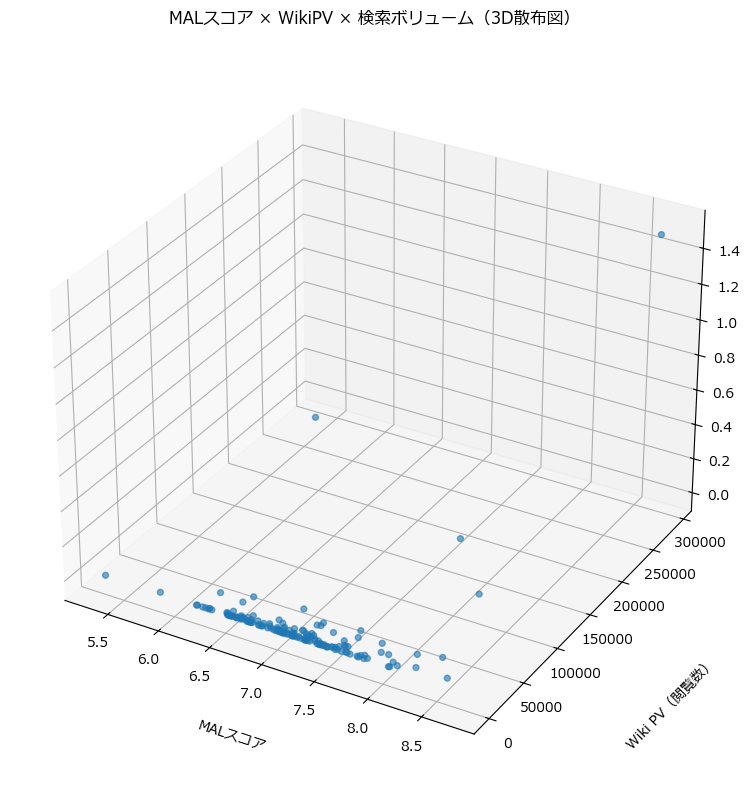

: 

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ------------------------------------
# 日本語フォント設定（Windows）
# ------------------------------------
plt.rcParams["font.family"] = "Meiryo"          # 日本語文字化け防止
plt.rcParams["axes.unicode_minus"] = False      # マイナス記号の文字化け防止

# ------------------------------------
# 1. SQLite からデータ取得
# ------------------------------------
db_path = "manga.db"            # 必要なら変更
table_name = "manga_works"

conn = sqlite3.connect(db_path)
query = f"""
SELECT
    title,
    myanimelist_score,
    wiki_pv,
    estimated_monthly_search_volume
FROM
    {table_name}
WHERE
    myanimelist_score IS NOT NULL
    AND wiki_pv IS NOT NULL
    AND estimated_monthly_search_volume IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 件数が多い場合はランダムサンプリング
if len(df) > 3000:
    df = df.sample(3000, random_state=0)

# ------------------------------------
# 2. 3D プロット
# ------------------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = df["myanimelist_score"]
y = df["wiki_pv"]
z = df["estimated_monthly_search_volume"]

sc = ax.scatter(x, y, z, s=18, alpha=0.6)

# ------------------------------------
# 3. 軸ラベル（はみ出し完全対策）
# ------------------------------------
ax.set_xlabel("MALスコア", labelpad=15)
ax.set_ylabel("Wiki PV（閲覧数）", labelpad=35, rotation=0)  # rotation=0で横向き
ax.set_zlabel("検索ボリューム", labelpad=15)

# タイトル
ax.set_title("MALスコア × WikiPV × 検索ボリューム（3D散布図）", pad=20)

# ------------------------------------
# 4. はみ出し対策：レイアウト調整
# ------------------------------------
plt.subplots_adjust(
    left=0.18,    # ← Y軸ラベルを内側に入れる
    right=0.95,
    top=0.92,
    bottom=0.10
)

plt.tight_layout()
plt.show()
